[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


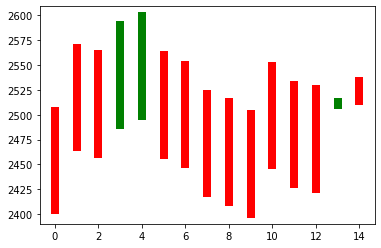

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data = np.linspace(1,15,15)
endPrice = np.array([2503.99,2567.12,2560.55,2489.99,2498.98,2559.67,2550.21,2521.00,2512.78,2500.34,2549.23,2530.12,2525.78,2510.10,2533.91])
beginPrice = np.array([2403.99,2467.12,2460.55,2589.99,2598.98,2459.67,2450.21,2421.00,2412.78,2400.34,2449.23,2430.12,2425.78,2513.10,2513.91])
print(data)

plt.figure() #定义绘图
for i in range(0,15):
    #1，柱状图
#     dataOne = np.array([i,i])
    dataOne = np.zeros([2]) # dataOne作为 x轴，也必须是 一个数组
    dataOne[0] = i
    dataOne[1] = i
    priceOne = np.zeros([2]) # priceOne作为 y轴，y轴范围[beginPrice,endPrice]
    priceOne[0] = beginPrice[i]
    priceOne[1] = endPrice[i]
    if endPrice[i] > beginPrice[i]:
        plt.plot(dataOne,priceOne,'r',lw=8) 
    else:
        plt.plot(dataOne,priceOne,'g',lw=8)
plt.show()

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


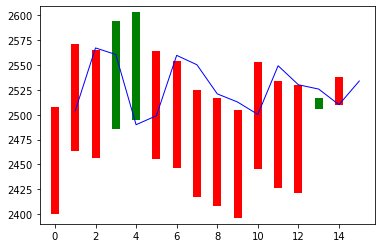

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data = np.linspace(1,15,15)
endPrice = np.array([2503.99,2567.12,2560.55,2489.99,2498.98,2559.67,2550.21,2521.00,2512.78,2500.34,2549.23,2530.12,2525.78,2510.10,2533.91])
beginPrice = np.array([2403.99,2467.12,2460.55,2589.99,2598.98,2459.67,2450.21,2421.00,2412.78,2400.34,2449.23,2430.12,2425.78,2513.10,2513.91])
print(data)

plt.figure() #定义绘图
for i in range(0,15):
    #1，柱状图
    dataOne = np.zeros([2])
    dataOne[0] = i
    dataOne[1] = i
    priceOne = np.zeros([2])
    priceOne[0] = beginPrice[i]
    priceOne[1] = endPrice[i]
    if endPrice[i] > beginPrice[i]:
        plt.plot(dataOne,priceOne,'r',lw=8)
    else:
        plt.plot(dataOne,priceOne,'g',lw=8)

#神经网络分层,及原理
# A为 输入层  B为中间层【隐藏层】 C为输出层
# A(15*1)*w1(1*10) + b1(1*10) = B(15*10)
# B(15*10)*w2(10*1) + b2(15*1) = C(15*1)
dataNormal = np.zeros([15,1])
priceNormal = np.zeros([15,1])
for i in range(0,15):
    dataNormal[i,0] = i/14.0
    priceNormal[i,0] = endPrice[i]/3000.0
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

# B【隐藏层】
w1 = tf.Variable(tf.random_uniform([1,10],0,1))
b1 = tf.Variable(tf.zeros([1,10]))
wb1 = tf.matmul(x,w1)+b1
layer1 = tf.nn.relu(wb1) # 激励函数

# C【输出层】
w2 = tf.Variable(tf.random_uniform([10,1],0,1))
b2 = tf.Variable(tf.zeros([15,1]))
wb2 = tf.matmul(layer1,w2)+b2
layer2 = tf.nn.relu(wb2)
loss = tf.reduce_mean(tf.square(y-layer2)) #y 真实 layer2 计算
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,10000):
        sess.run(train_step,feed_dict={x:dataNormal,y:priceNormal})
    pred = sess.run(layer2,feed_dict={x:dataNormal}) 
    predPrice = np.zeros([15,1])
    for i in range(0,15):
        predPrice[i,0] = (pred*3000)[i,0]
    plt.plot(data,predPrice,'b',lw=1)
plt.show()
    
    
    
    
    